In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset="students/students.csv"
data = pd.read_csv(dataset)
data

,student_id,student_name,overall_gpa,obtained_credits,enrolled_credits,attendance_rate
0,21GW001,奥村 里歩,0.410,3,22,68.6
1,21GW002,酒井 璃玖,0.548,10,22,73.9
2,21GW003,大橋 雄大,0.835,11,18,65.0
3,21GW004,川村 杏莉,1.003,14,22,81.6
4,21GW005,大沢 楽,1.047,12,23,64.9
...,...,...,...,...,...,...
125,21GW126,浅野 奈穂,3.653,20,22,98.9
126,21GW127,中山 瑞稀,3.716,21,21,100.0
127,21GW128,杉山 航輝,3.729,22,22,100.0
128,21GW129,竹内 綾音,3.731,22,22,99.0


In [3]:
# メタデータ：テーブル(table)や属性(field)の定義
from sdv import Metadata
# with open('students/metadata.json') as meta_file:
#     print(meta_file.read())
metadata = Metadata('students/metadata.json')
metadata

Metadata
  root_path: students
  tables: ['students']
  relationships:

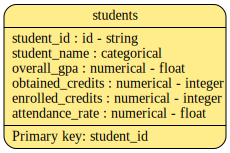

In [4]:
metadata.visualize()

In [5]:
from sdv import SDV
from sdv.tabular import GaussianCopula
from sdv.tabular import CTGAN
from sdv.tabular import TVAE
from sdv.tabular import CopulaGAN

#デフォルトモデルGaussianCopulaを使用しモデルを作成
sdv = SDV() 

# テーブル一覧。一つだけの場合
tables = {'students':data}
#複数の場合は
#tables = {'students':data1, 'teachers':data2,...}

sdv.fit(metadata, tables)

In [6]:
sampled = sdv.sample_all()

In [7]:
from sdv.utils import display_tables
display_tables(sampled)

In [8]:
sampled['students']

,student_id,student_name,overall_gpa,obtained_credits,enrolled_credits,attendance_rate
0,21WT001,吉田 真綾,2.105,23,23,94.3
1,21WT002,池田 篤司,2.745,23,22,95.1
2,21WT003,佐藤 太一,2.705,18,20,100.0
3,21WT004,岡本 くみ子,2.393,20,24,85.6
4,21WT005,渡辺 稔,2.009,16,23,87.2
...,...,...,...,...,...,...
125,21WT139,吉田 七夏,3.822,21,20,97.6
126,21WT141,山口 翼,3.822,22,23,95.9
127,21WT142,林 零,1.814,16,22,89.2
128,21WT143,藤井 治,1.404,17,22,88.4


In [9]:
sampled['students'].describe()

,overall_gpa,obtained_credits,enrolled_credits,attendance_rate
count,130.000000,130.000000,130.000000,130.000000
mean,2.695338,20.907692,22.384615,93.680000
std,0.640408,2.891973,1.266042,5.323116
min,1.273000,14.000000,19.000000,80.300000
25%,2.225250,19.000000,22.000000,89.975000
50%,2.737500,21.000000,22.000000,94.650000
75%,3.122000,23.000000,23.000000,98.275000
max,3.822000,28.000000,26.000000,100.000000


In [10]:
data.describe()

,overall_gpa,obtained_credits,enrolled_credits,attendance_rate
count,130.000000,130.000000,130.000000,130.000000
mean,2.742823,21.230769,22.369231,94.275385
std,0.659692,3.048798,1.330259,6.400655
min,0.410000,3.000000,18.000000,64.900000
25%,2.429500,20.000000,22.000000,92.550000
50%,2.863500,22.000000,22.000000,96.050000
75%,3.229500,23.000000,23.000000,98.275000
max,3.822000,28.000000,26.000000,100.000000


In [11]:
from sdv.relational import HMA1

model = HMA1(metadata)
model.fit(tables)

In [12]:
new_data = model.sample()

In [13]:
display_tables(new_data)

In [14]:
new_data['students']

,student_id,student_name,overall_gpa,obtained_credits,enrolled_credits,attendance_rate
0,21WT001,岡田 香織,2.005,14,20,86.8
1,21WT002,中村 太一,3.314,22,21,100.0
2,21WT003,近藤 里佳,3.708,24,23,100.0
3,21WT004,林 香織,2.913,20,23,91.6
4,21WT005,山口 治,3.822,27,23,100.0
...,...,...,...,...,...,...
125,21WT139,西村 知実,3.012,19,21,93.0
126,21WT141,山本 和也,2.028,19,22,87.6
127,21WT142,高橋 零,3.820,23,22,100.0
128,21WT143,小林 直子,2.455,19,21,90.9


In [15]:
new_data['students'].describe()

,overall_gpa,obtained_credits,enrolled_credits,attendance_rate
count,130.000000,130.000000,130.000000,130.000000
mean,2.727862,21.176923,22.338462,93.810769
std,0.653664,3.148681,1.384039,5.360395
min,0.904000,13.000000,19.000000,77.500000
25%,2.240000,19.000000,21.000000,89.200000
50%,2.736500,21.000000,22.000000,94.600000
75%,3.278750,23.000000,23.000000,99.200000
max,3.822000,28.000000,26.000000,100.000000


In [16]:
data.describe()

,overall_gpa,obtained_credits,enrolled_credits,attendance_rate
count,130.000000,130.000000,130.000000,130.000000
mean,2.742823,21.230769,22.369231,94.275385
std,0.659692,3.048798,1.330259,6.400655
min,0.410000,3.000000,18.000000,64.900000
25%,2.429500,20.000000,22.000000,92.550000
50%,2.863500,22.000000,22.000000,96.050000
75%,3.229500,23.000000,23.000000,98.275000
max,3.822000,28.000000,26.000000,100.000000
